In [3]:
%matplotlib inline
%load_ext zipline

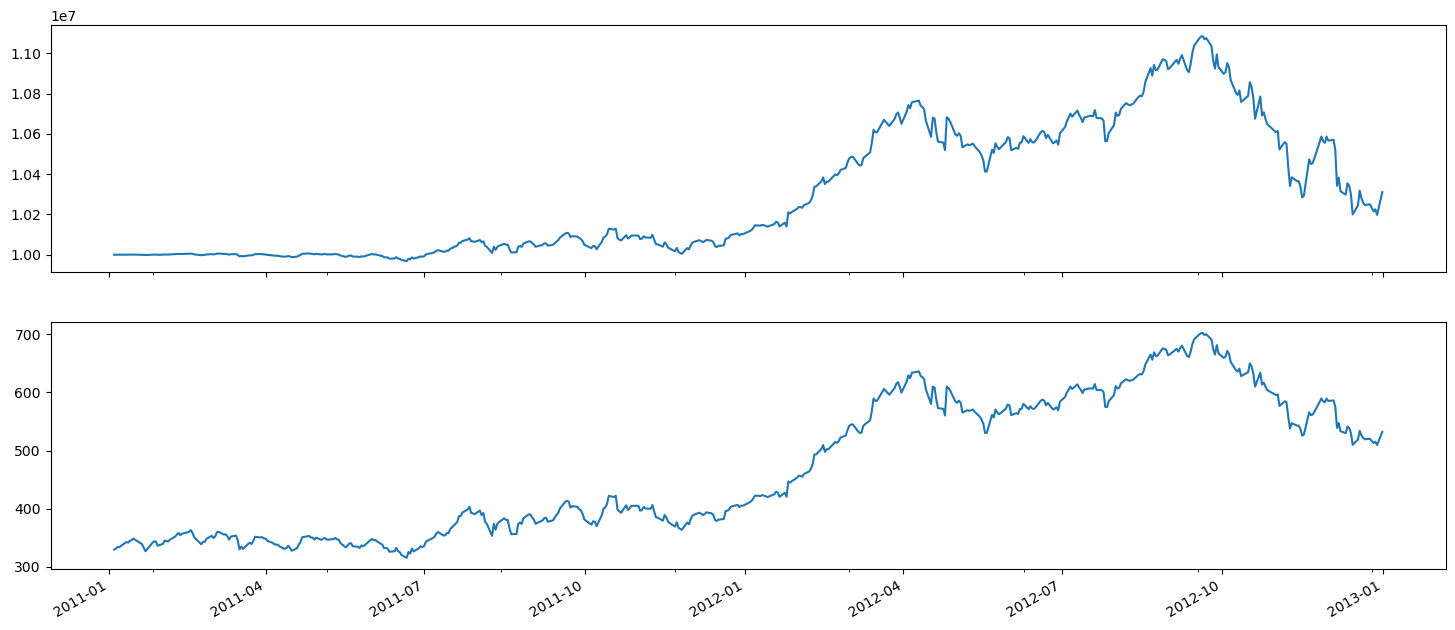

,period_open,period_close,ending_exposure,longs_count,ending_cash,starting_exposure,starting_cash,ending_value,returns,starting_value,...,max_leverage,excess_return,max_drawdown,sortino,sharpe,algorithm_period_return,alpha,beta,algo_volatility,period_label
2011-01-03 21:00:00+00:00,2011-01-03 14:31:00+00:00,2011-01-03 21:00:00+00:00,0.00,0,1.000000e+07,0.00,1.000000e+07,0.00,0.000000e+00,0.00,...,0.000000,0.0,0.000000e+00,NaN,NaN,0.000000e+00,None,None,NaN,2011-01
2011-01-04 21:00:00+00:00,2011-01-04 14:31:00+00:00,2011-01-04 21:00:00+00:00,3312.90,1,9.996685e+06,0.00,1.000000e+07,3312.90,-1.666450e-07,0.00,...,0.000331,0.0,-1.666450e-07,-11.224972,-11.224972,-1.666450e-07,None,None,0.000002,2011-01
2011-01-05 21:00:00+00:00,2011-01-05 14:31:00+00:00,2011-01-05 21:00:00+00:00,6680.00,1,9.993344e+06,3312.90,9.996685e+06,6680.00,2.542000e-06,3312.90,...,0.000668,0.0,-1.666450e-07,130.639936,8.279999,2.375355e-06,None,None,0.000024,2011-01
2011-01-06 21:00:00+00:00,2011-01-06 14:31:00+00:00,2011-01-06 21:00:00+00:00,10011.90,1,9.990005e+06,6680.00,9.993344e+06,10011.90,-7.078633e-07,6680.00,...,0.001001,0.0,-7.078633e-07,18.200004,4.568256,1.667490e-06,None,None,0.000023,2011-01
2011-01-07 21:00:00+00:00,2011-01-07 14:31:00+00:00,2011-01-07 21:00:00+00:00,13444.80,1,9.986642e+06,10011.90,9.990005e+06,13444.80,7.000928e-06,10011.90,...,0.001344,0.0,-7.078633e-07,84.623827,8.598826,8.668430e-06,None,None,0.000051,2011-01
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2012-12-24 18:00:00+00:00,2012-12-24 14:31:00+00:00,2012-12-24 18:00:00+00:00,2585234.96,1,7.665407e+06,2575876.80,7.670611e+06,2585234.96,4.053944e-04,2575876.80,...,0.274341,0.0,-7.975863e-02,0.429102,0.299939,2.506420e-02,None,None,0.045157,2012-12
2012-12-26 21:00:00+00:00,2012-12-26 14:31:00+00:00,2012-12-26 21:00:00+00:00,2554740.00,1,7.660274e+06,2585234.96,7.665407e+06,2554740.00,-3.475639e-03,2585234.96,...,0.274341,0.0,-7.975863e-02,0.371869,0.260329,2.150144e-02,None,None,0.045181,2012-12
2012-12-27 21:00:00+00:00,2012-12-27 14:31:00+00:00,2012-12-27 21:00:00+00:00,2570149.40,1,7.655121e+06,2554740.00,7.660274e+06,2570149.40,1.004033e-03,2554740.00,...,0.274341,0.0,-7.975863e-02,0.387512,0.271249,2.252707e-02,None,None,0.045141,2012-12
2012-12-28 21:00:00+00:00,2012-12-28 14:31:00+00:00,2012-12-28 21:00:00+00:00,2547945.00,1,7.650023e+06,2570149.40,7.655121e+06,2547945.00,-2.670134e-03,2570149.40,...,0.274341,0.0,-7.993422e-02,0.343959,0.240977,1.979678e-02,None,None,0.045137,2012-12


In [5]:
%%zipline --start=2011-1-1 --end=2013-1-1 --no-benchmark

from zipline.api import order, record, symbol
import matplotlib.pyplot as plt

def initialize(context):
    pass

def handle_data(context, data):
    order(symbol('GOOG'), 10)
    record(AAPL=data.current(symbol('GOOG'), "price"))
    
def analyze(context, perf):
    ax1 = plt.subplot(211)
    perf.portfolio_value.plot(ax=ax1)
    ax2 = plt.subplot(212, sharex=ax1)
    perf.AAPL.plot(ax=ax2)
    plt.gcf().set_size_inches(18, 8)
    plt.show()

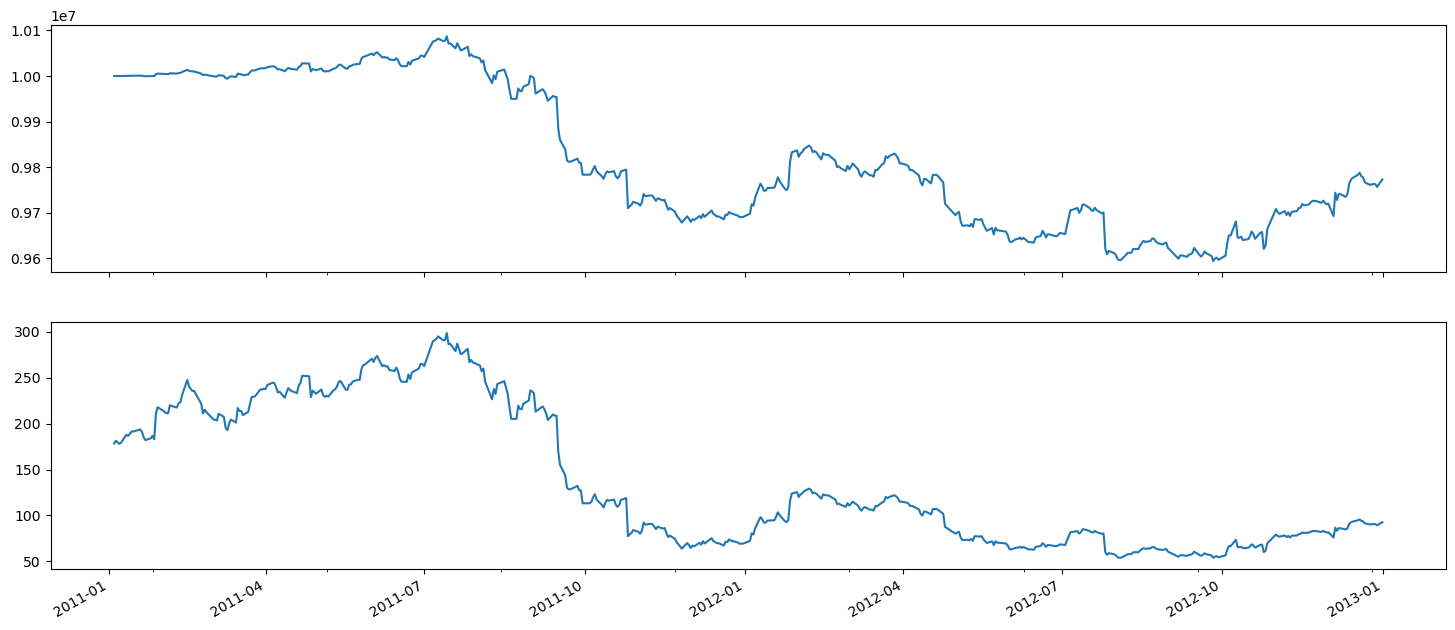

,period_open,period_close,ending_value,starting_cash,ending_cash,returns,portfolio_value,longs_count,shorts_count,long_value,...,trading_days,period_label,algorithm_period_return,algo_volatility,benchmark_period_return,benchmark_volatility,alpha,beta,sharpe,sortino
2011-01-03 21:00:00+00:00,2011-01-03 14:31:00+00:00,2011-01-03 21:00:00+00:00,0.0,1.000000e+07,1.000000e+07,0.000000e+00,1.000000e+07,0,0,0.0,...,1,2011-01,0.000000e+00,NaN,0.0,NaN,None,None,NaN,NaN
2011-01-04 21:00:00+00:00,2011-01-04 14:31:00+00:00,2011-01-04 21:00:00+00:00,1813.7,1.000000e+07,9.998185e+06,-9.168500e-08,9.999999e+06,1,0,1813.7,...,2,2011-01,-9.168500e-08,0.000001,0.0,0.0,None,None,-11.224972,-11.224972
2011-01-05 21:00:00+00:00,2011-01-05 14:31:00+00:00,2011-01-05 21:00:00+00:00,3594.6,9.998185e+06,9.996387e+06,-1.730865e-06,9.999982e+06,1,0,3594.6,...,3,2011-01,-1.822550e-06,0.000015,0.0,0.0,None,None,-9.902201,-9.637124
2011-01-06 21:00:00+00:00,2011-01-06 14:31:00+00:00,2011-01-06 21:00:00+00:00,5339.7,9.996387e+06,9.994606e+06,-3.570002e-06,9.999946e+06,1,0,5339.7,...,4,2011-01,-5.392545e-06,0.000027,0.0,0.0,None,None,-12.729608,-10.785373
2011-01-07 21:00:00+00:00,2011-01-07 14:31:00+00:00,2011-01-07 21:00:00+00:00,7172.0,9.994606e+06,9.992812e+06,3.839371e-06,9.999984e+06,1,0,7172.0,...,5,2011-01,-1.553195e-06,0.000043,0.0,0.0,None,None,-1.800393,-2.778484
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2012-12-24 18:00:00+00:00,2012-12-24 14:31:00+00:00,2012-12-24 18:00:00+00:00,448443.1,9.313517e+06,9.312614e+06,-5.637665e-04,9.761057e+06,1,0,448443.1,...,498,2012-12,-2.389431e-02,0.018755,0.0,0.0,None,None,-0.643119,-0.828738
2012-12-26 21:00:00+00:00,2012-12-26 14:31:00+00:00,2012-12-26 21:00:00+00:00,451437.0,9.312614e+06,9.311707e+06,2.138023e-04,9.763144e+06,1,0,451437.0,...,499,2012-12,-2.368562e-02,0.018737,0.0,0.0,None,None,-0.636682,-0.820481
2012-12-27 21:00:00+00:00,2012-12-27 14:31:00+00:00,2012-12-27 21:00:00+00:00,451595.0,9.311707e+06,9.310801e+06,-7.655961e-05,9.762396e+06,1,0,451595.0,...,500,2012-12,-2.376037e-02,0.018719,0.0,0.0,None,None,-0.638107,-0.822311
2012-12-28 21:00:00+00:00,2012-12-28 14:31:00+00:00,2012-12-28 21:00:00+00:00,446650.0,9.310801e+06,9.309908e+06,-5.980864e-04,9.756558e+06,1,0,446650.0,...,501,2012-12,-2.434424e-02,0.018704,0.0,0.0,None,None,-0.653416,-0.841862


In [8]:
%%zipline --start=2017-1-1 --end=2018-1-1 --no-benchmark

from zipline.api import order, record, symbol
import matplotlib.pyplot as plt

def initialize(context):
    pass

def handle_data(context, data):
    order(symbol('NFLX'), 10)
    record(AAPL=data.current(symbol('NFLX'), "price"))
    
def analyze(context, perf):
    ax1 = plt.subplot(211)
    perf.portfolio_value.plot(ax=ax1)
    ax2 = plt.subplot(212, sharex=ax1)
    perf.AAPL.plot(ax=ax2)
    plt.gcf().set_size_inches(18, 8)
    plt.show()